In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's work with a set of data for the classification task. Let's get the data consisting of two informative features (`n_features=2, n_informative=2`) in the amount of 20 pieces (`n_samples=20`) to predict one target variable, which will consist of two classes (`n_classes=2`), through the `make_classification` method.

In [1]:
from sklearn import datasets


X, y = datasets.make_classification(
    n_samples=20,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=2
)

X, y

(array([[ 0.24306743, -0.52734094],
        [ 0.96417816, -0.37583852],
        [-1.08486058,  0.00847624],
        [-0.90653761,  3.3851625 ],
        [ 1.33279979,  1.25629151],
        [ 0.72576002,  0.53047004],
        [-0.77546276, -0.9788468 ],
        [ 1.03317819, -0.88253973],
        [ 1.39939732,  3.2047161 ],
        [-0.07784592, -0.67730036],
        [ 1.2610877 , -1.3003902 ],
        [-2.44391337, -0.56099989],
        [-1.11064538,  0.7571574 ],
        [-0.90474756,  0.59452911],
        [-2.51019507, -0.30991259],
        [ 0.9153728 ,  0.08016006],
        [ 1.28700068, -1.90827144],
        [-1.94625628, -0.53314708],
        [-0.91390999,  2.05571391],
        [-1.33222706, -0.85982898]]),
 array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]))

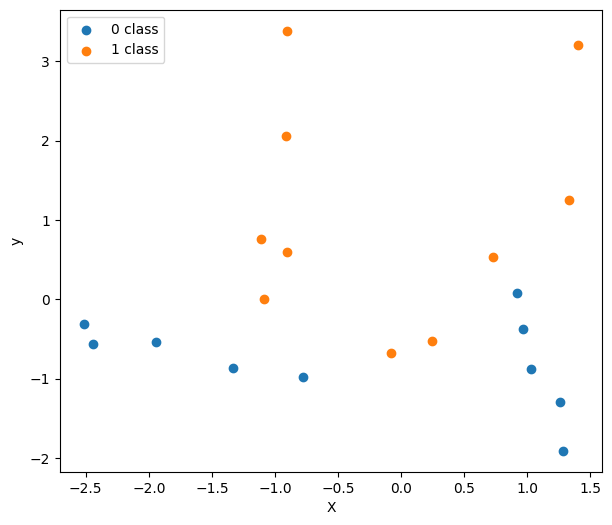

In [3]:
plt.figure(figsize=(7, 6))

class_0 = X[y == 0]
class_1 = X[y == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='0 class')
plt.scatter(class_1[:, 0], class_1[:, 1], label='1 class')

plt.legend()
plt.xlabel('X')
plt.ylabel('y');

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

pred = logreg.predict(X)

In [5]:
pred_df = pd.DataFrame({
    'ground truth': y,
    'prediction': pred
})

pred_df

,ground truth,prediction
0,1,0
1,0,0
2,1,0
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,1,0


In the first line should have predicted 1 class, but the model predicted 0, but the next object has no problem, the target label is 0 class, predicted also zero class, we can further look at all objects and compare the truth with the predicted class.   

Если мы так сделаем, то узнаем сколько раз модель ответила правильно - это и есть наша первая метрика Accuracy.


Это наиболее очевидный и простой способ расчета качества предсказаний:

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$


Доля правильных ответов может изменяться от 0 до 1, где 0 - модель ниразу не попала правильно, все её предсказания ошибочные, а 1 - модель предсказала всё идеально.

In [6]:
pred_df['right'] = pred_df['ground truth'] == pred_df['prediction']
pred_df

,ground truth,prediction,right
0,1,0,False
1,0,0,True
2,1,0,False
3,1,1,True
4,1,1,True
5,1,1,True
6,0,0,True
7,0,0,True
8,1,1,True
9,1,0,False


In [7]:
wrong_objects_0_class = X[~(pred_df['right']) & (pred_df['ground truth'] == 0)]
wrong_objects_1_class = X[~(pred_df['right']) & (pred_df['ground truth'] == 1)]

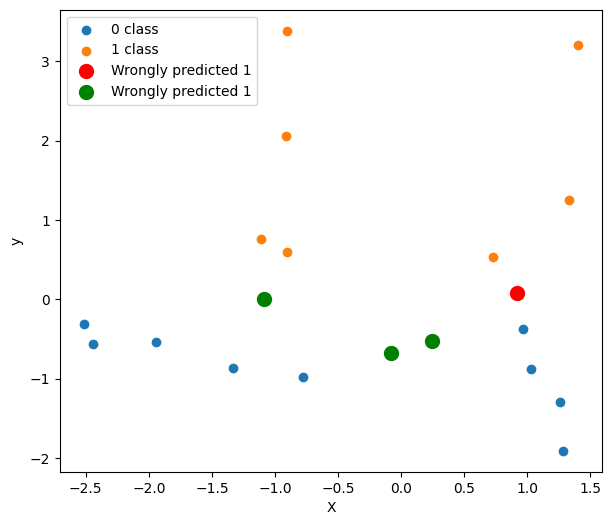

In [8]:
plt.figure(figsize=(7, 6))

class_0 = X[y == 0]
class_1 = X[y == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='0 class')
plt.scatter(class_1[:, 0], class_1[:, 1], label='1 class')


plt.scatter(wrong_objects_0_class[:, 0], wrong_objects_0_class[:, 1], c='r', label='Wrongly predicted 1', s=100)
plt.scatter(wrong_objects_1_class[:, 0], wrong_objects_1_class[:, 1], c='g', label='Wrongly predicted 1', s=100)

plt.legend()
plt.xlabel('X')
plt.ylabel('y');

In [9]:
pred_df[pred_df['right'] == True].shape[0]
pred_df['right'].sum() / pred_df.shape[0]

0.8

In [10]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_df['ground truth'], pred_df['prediction'])

0.8